# Bench

Benchmark testing between ROOT-based fire and HDF5-based fire.

The actual compiling and running of this module is done in the
[benchmark GitHub action](../.github/workflows/bench.yml).

In short, after compiling whichever version of the framework we are
using against this module, we run the command

```bash
ldmx time fire config.py <num-events>
```

To time how long the processing takes. We do this over several trials
and average the results for the time in seconds, and then

```bash
stat output/*
```

To obtain how large the output data file is in bytes.

## This File
This jupyter notebook uses a manually written CSV file where the average times and the output file sizes are copied from the GitHub action logs. These numbers could also be generated manually on a local machine if you so wish.

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
data = pd.read_csv('data.csv')
data

,runner,serializer,events,time,size
0,docker,hdf5,1,0.042,41130
1,docker,root,1,0.244,12908
2,docker,hdf5,10,0.049,46113
3,docker,root,10,0.286,17663
4,docker,hdf5,100,0.051,79434
5,docker,root,100,0.292,53619
6,docker,hdf5,1000,0.060,416935
7,docker,root,1000,0.279,411848
8,docker,hdf5,10000,0.304,3875028
9,docker,root,10000,0.578,4112846


In [34]:
# partition dataset into two different serializers
hdf5_bench = data[data['serializer'] == 'hdf5']
root_bench = data[data['serializer'] == 'root']

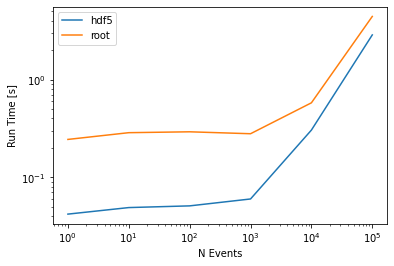

In [37]:
plt.yscale('log')
plt.xscale('log')
plt.xlabel('N Events')
plt.ylabel('Run Time [s]')
plt.plot(hdf5_bench['events'],hdf5_bench['time'],label='hdf5')
plt.plot(root_bench['events'],root_bench['time'],label='root')
plt.legend()
plt.show()

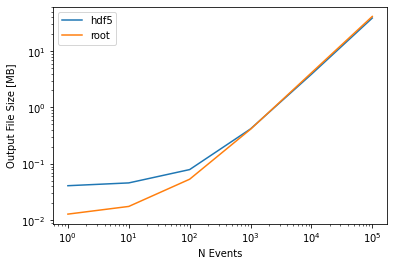

In [39]:
plt.yscale('log')
plt.xscale('log')
plt.xlabel('N Events')
plt.ylabel('Output File Size [MB]')
plt.plot(hdf5_bench['events'],hdf5_bench['size']/1e6,label='hdf5')
plt.plot(root_bench['events'],root_bench['size']/1e6,label='root')
plt.legend()
plt.show()